# Práctica 7b: análisis de regresión lineal múltiple

##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources
* [Chapter 10. Regression]()

## Recipe

El objetivo sigue siendo ajustar una línea que muestre mejor la relación entre una variable independiente $X$ y el objetivo $y$. La diferencia es que en la Regresión Lineal Múltiple, tenemos que tratar con al menos 2 características o variables independientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
file = '/home/vagrant/practicas/heart.csv'

In [3]:
# Importamos el conjunto de datos 
df = pd.read_csv(file) 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


En este conjunto de datos  hay múltiples características o variables independientes (`edad`, `sexo`). Nuevamente, el objetivo aquí es revelar o descubrir una relación entre las variables independientes y el objetivo (`target`). 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df),
                 columns=df.columns)
df_sc.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [6]:
# Definimos quién es X y quién y
X = df_sc.iloc[:, :-1].values
y = df_sc.iloc[:, 13].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import Ridge 
model = Ridge()
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))
y_pred

Desempeño del modelo:  0.4708902860915052


array([ 0.05712939,  0.70913622,  0.73293321,  0.02067007,  0.24868627,
        0.5146    ,  0.19368769,  0.27241243, -0.15767149, -0.20686625,
        0.64485347,  0.89565143,  0.1288611 ,  0.75983554,  0.9839583 ,
        0.60538557,  0.19051868,  0.65226871, -0.12569606,  0.73235021,
        0.71693531,  0.46151607,  0.27252072,  0.2354667 ,  0.8012037 ,
        0.60246025,  0.32826603,  0.49821347,  1.05199825,  0.60923568,
        0.61796861, -0.0448646 ,  1.00726442,  0.66635845,  0.85872193,
        0.56077121,  0.08976547,  0.775004  ,  0.17617391,  0.31867026,
        0.65020294,  0.73741983,  0.43357539,  0.19376993,  0.52822267,
        0.64172183,  0.7467652 ,  0.59316364,  0.15664691,  0.73601991,
        0.77892054,  0.56100951,  0.98556552,  0.76626429,  1.23464086,
        0.2561595 ,  0.92901728,  0.85497408,  0.69588533,  0.95327411,
        0.71475413])

In [10]:
#Aplicamos PCA para visualizar los resultados
#features = ["State_0", "State_1", "State_2", "R&D Spend", "Administration", "Marketing Spend"]
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(X_train))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.725025,0.379135,-0.082274,0.159623,0.349666,0.163153,-0.131406,0.024267,0.244465,-0.081576,0.109099,-0.097916,0.002536
1,-0.649557,0.420819,0.143386,0.299663,0.096577,-0.323885,0.193374,0.056899,-0.099647,-0.058181,0.240679,-0.033408,-0.005680
2,-0.325691,-0.578485,0.758473,-0.483246,-0.047824,-0.112150,-0.153532,-0.032740,-0.139356,0.021664,-0.026427,-0.012216,-0.095918
3,0.289974,0.962025,-0.196511,-0.124602,0.180978,0.151430,-0.130576,0.143574,-0.108082,-0.168159,0.177582,-0.034432,-0.147936
4,-0.195189,-0.462495,-0.146104,-0.086966,-0.240185,-0.285204,0.087752,0.089472,-0.118835,0.170660,0.105511,-0.080285,-0.038506


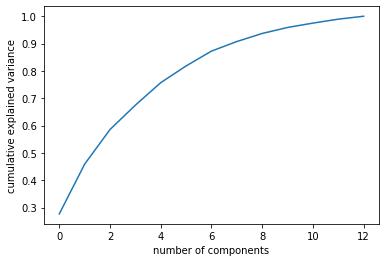

In [11]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [14]:

df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12',"PC13"]
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.725025,0.379135,-0.082274,0.159623,0.349666,0.163153,-0.131406,0.024267,0.244465,-0.081576,0.109099,-0.097916,0.002536
1,-0.649557,0.420819,0.143386,0.299663,0.096577,-0.323885,0.193374,0.056899,-0.099647,-0.058181,0.240679,-0.033408,-0.005680
2,-0.325691,-0.578485,0.758473,-0.483246,-0.047824,-0.112150,-0.153532,-0.032740,-0.139356,0.021664,-0.026427,-0.012216,-0.095918
3,0.289974,0.962025,-0.196511,-0.124602,0.180978,0.151430,-0.130576,0.143574,-0.108082,-0.168159,0.177582,-0.034432,-0.147936
4,-0.195189,-0.462495,-0.146104,-0.086966,-0.240185,-0.285204,0.087752,0.089472,-0.118835,0.170660,0.105511,-0.080285,-0.038506


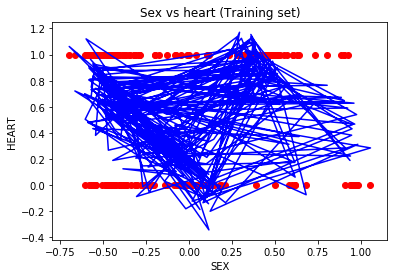

In [17]:
# Visualising the Training set results
plt.scatter(df_pca.PC2, y_train, color = 'red') 
plt.plot(df_pca.PC2, model.predict(X_train), color = 'blue') 
plt.title('Sex vs heart (Training set)') 
plt.xlabel('SEX')
plt.ylabel('HEART')
plt.show()